Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


*** Inspect the various aspects of the bike dataframe ***

In [5]:
# instant column is irrelevant to our analysis hence dropping it

bike = bike.drop(columns=['instant'])

In [6]:
bike.shape

(730, 15)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [8]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Similarly drop dteday column as we already have year and month column 

bike = bike.drop(columns=['dteday'])

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). It is advisable to convert such feature values into categorical string values before proceeding with model building.

In [13]:
# Converting 'season' column to its categorical value

# Defining the map function
def binary_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the housing list
bike[['season']] = bike[['season']].apply(binary_map)

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Converting 'weathersit' column to its categorical value

# Defining the map function
def binary_map(x):
    return x.map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                  4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

# Applying the function to the housing list
bike[['weathersit']] = bike[['weathersit']].apply(binary_map)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's now spend some time **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

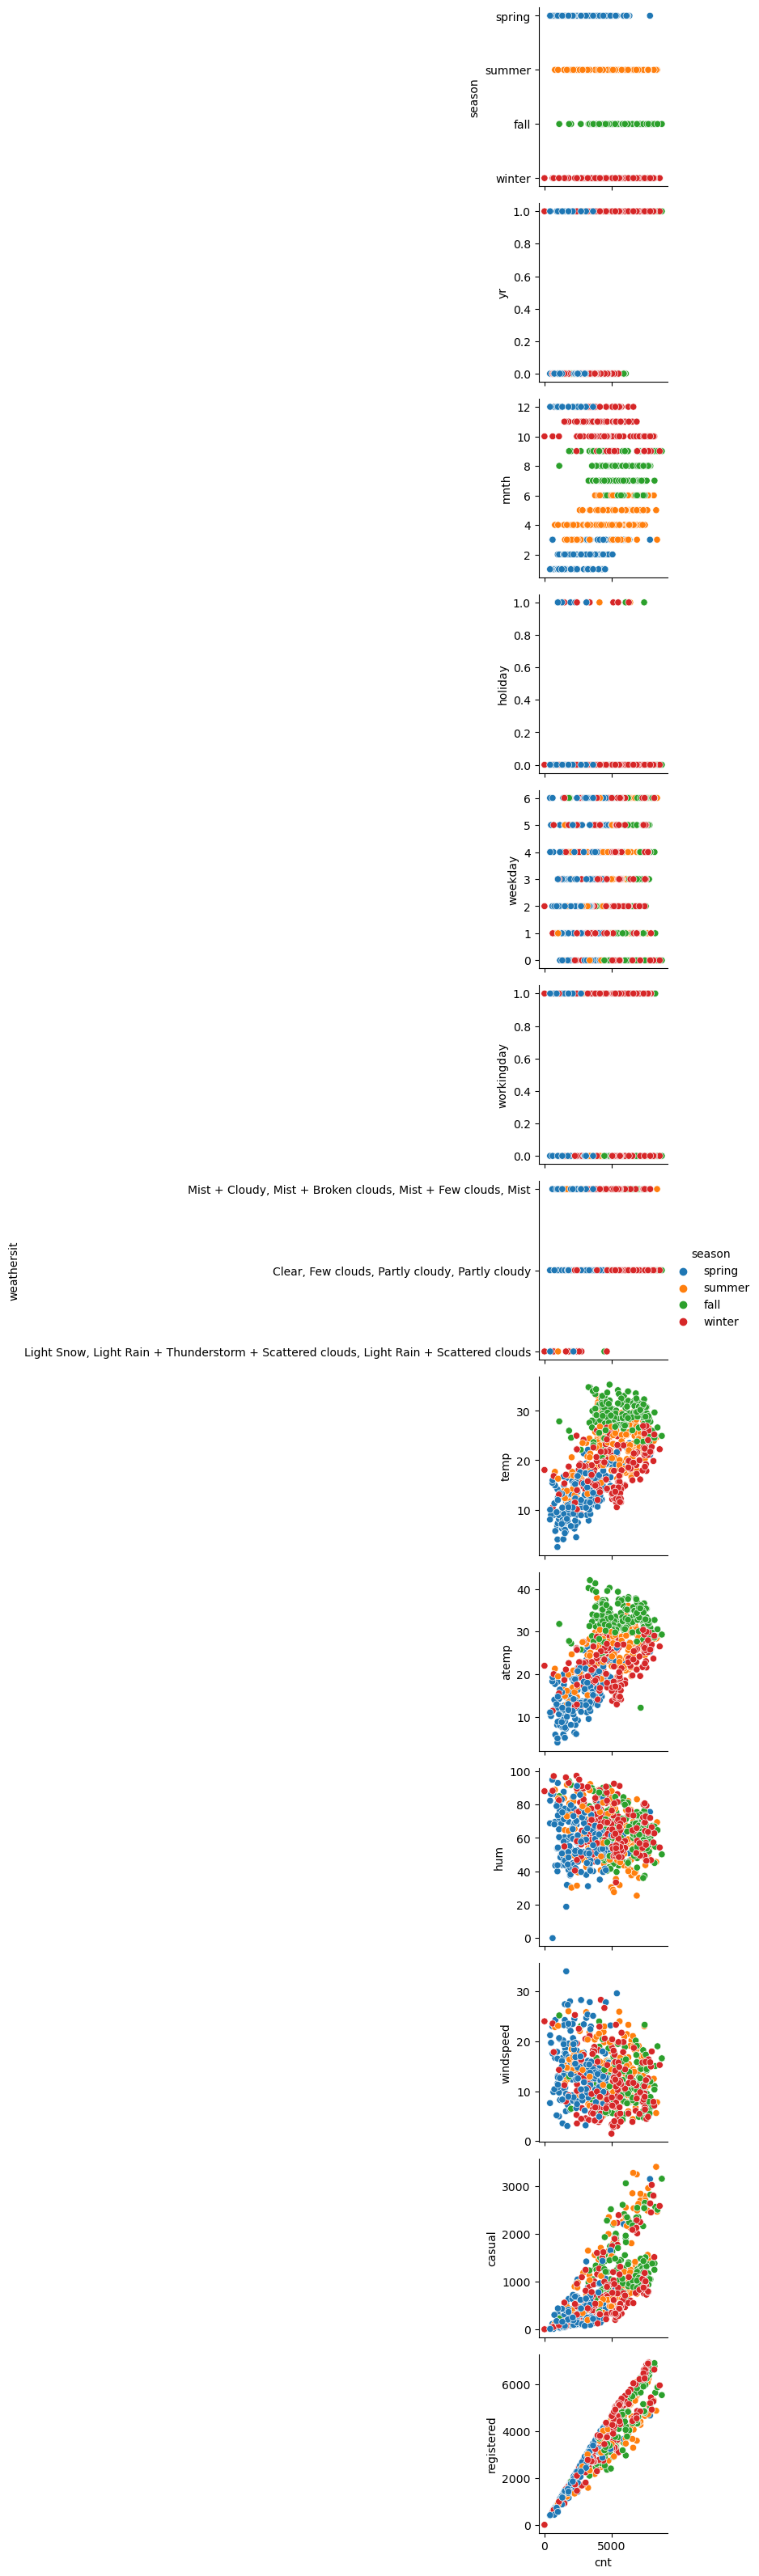

In [18]:
sns.pairplot(data=bike, y_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 
             'windspeed', 'casual', 'registered'], x_vars='cnt', hue='season')
plt.show()


## Step 3: Data Preparation

### Dummy variables


In [19]:
# create dummy variables for season, months, weekday, weathersit

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'], dtype = int)

In [21]:
# Check what the dataset 'season_dummy' looks like
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need three columns. You can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [22]:
# Let's drop the first column from season_dummy df using 'drop_first = True'

season_dummy = pd.get_dummies(bike['season'], drop_first = True, dtype = int)

In [23]:
# Add the results to the original dataframe

bike = pd.concat([bike, season_dummy], axis = 1)

In [24]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [25]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [26]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [27]:
#Similarly for months, weekday, weathersit

mnth_dummy = pd.get_dummies(bike['mnth'], dtype = int)
weekday_dummy = pd.get_dummies(bike['weekday'], dtype = int)
weathersit_dummy = pd.get_dummies(bike['weathersit'], dtype = int)

In [28]:
# Let's drop the first column 

mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True, dtype = int)

In [29]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [30]:
month_names = [
    'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

mnth_dummy.columns = month_names

In [31]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [32]:
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True, dtype = int)

In [33]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [34]:
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

weekday_dummy.columns = weekday_names

In [35]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [36]:
weathersit_dummy = pd.get_dummies(bike['weathersit'], dtype = int)

In [37]:
# Check what the dataset 'weathersit_dummy' looks like
weathersit_dummy.head()

,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
# Add the results to the original dataframe

bike = pd.concat([bike, mnth_dummy, weekday_dummy, weathersit_dummy], axis = 1)

In [39]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,1,0,1,0,0


In [40]:
# Drop 'mnth, weekday, weathersit' as we have created the dummies for it

bike.drop(['mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [41]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,1,0,1,0,0


In [42]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Here we can see that except for `temp	atemp	hum	windspeed	casual	registered	cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. We will use MinMax scaling.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp',	'atemp', 'hum',	'windspeed', 'casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


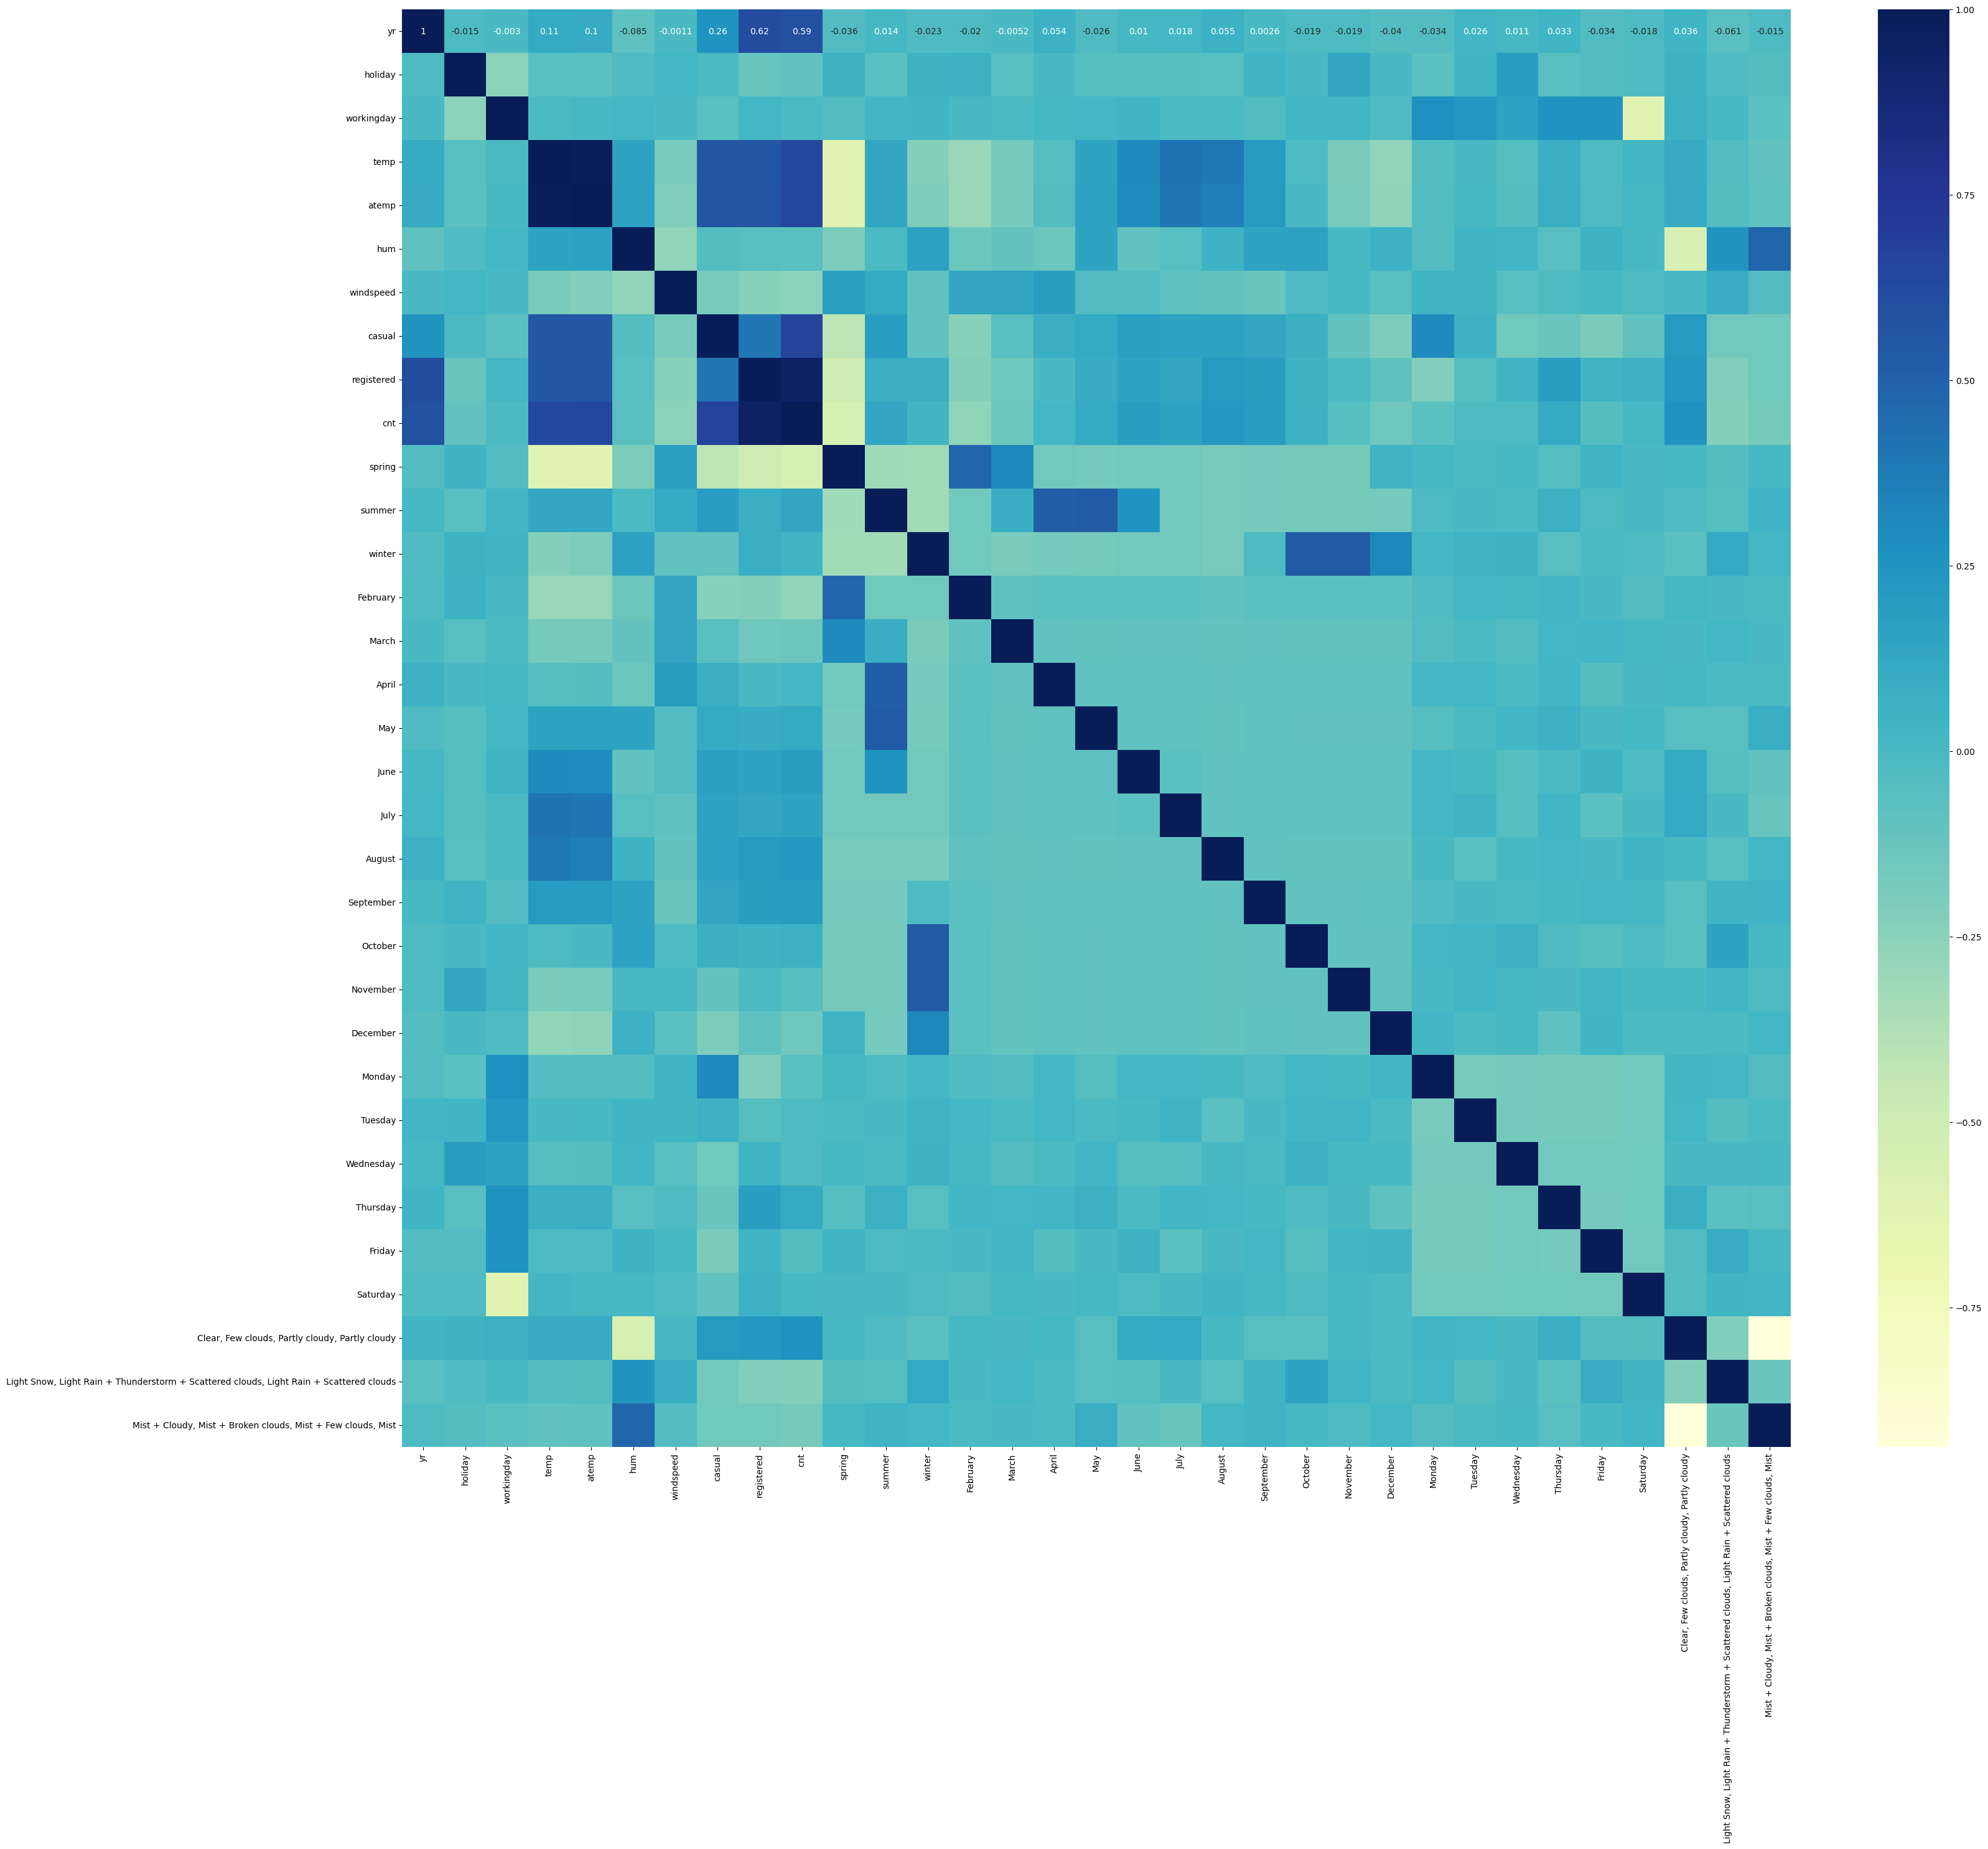

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (36, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu") 
plt.show()

### Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [51]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [52]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                                                                                      7.910339e-16
yr                                                                                        -4.371503e-16
holiday                                                                                    2.081668e-16
workingday                                                                                -1.110223e-16
temp                                                                                       7.771561e-16
atemp                                                                                     -2.220446e-15
hum                                                                                        8.326673e-17
windspeed                                                                                  4.579670e-16
casual                                                                                     3.774735e-01
registered                                                      

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.546e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:00   Log-Likelihood:                 17067.
No. Observations:                 510   AIC:                        -3.407e+04
Df Residuals:                     478   BIC:                        -3.393e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,"Clear, Few clouds, Partly cloudy, Partly cloudy",78.82
3,temp,68.65
2,workingday,66.54
4,atemp,56.10
31,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",47.23
23,Monday,43.27
24,Tuesday,42.06
27,Friday,41.24
26,Thursday,40.59
25,Wednesday,37.55


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a very high p-value and VIF. Let's go ahead and drop this variables

In [56]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('workingday', axis=1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.320e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:00   Log-Likelihood:                 17253.
No. Observations:                 510   AIC:                        -3.444e+04
Df Residuals:                     479   BIC:                        -3.431e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [57]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,"Clear, Few clouds, Partly cloudy, Partly cloudy",78.59
2,temp,68.63
3,atemp,56.09
30,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",47.13
8,spring,10.88
17,August,10.10
10,winter,9.90
16,July,8.98
9,summer,8.41
18,September,7.01


From the summary, we can still see some of them have a high p-value. `Clear, Few clouds, Partly cloudy, Partly cloudy` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [58]:
X = X.drop('Clear, Few clouds, Partly cloudy, Partly cloudy', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.052e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:08   Log-Likelihood:                 17231.
No. Observations:                 510   AIC:                        -3.440e+04
Df Residuals:                     479   BIC:                        -3.427e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [59]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,457.59
3,atemp,383.91
7,registered,35.88
4,hum,33.84
10,winter,11.56
9,summer,9.38
17,August,9.20
16,July,7.94
8,spring,7.53
6,casual,7.28


From the summary, we can still see some of them have a high p-value. `atemp` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [60]:
X = X.drop('atemp', axis=1)

# Build a forth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.112e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:20   Log-Likelihood:                 16965.
No. Observations:                 510   AIC:                        -3.387e+04
Df Residuals:                     480   BIC:                        -3.374e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [61]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,57.05
6,registered,35.81
3,hum,33.80
9,winter,11.55
8,summer,9.34
16,August,9.08
15,July,7.91
7,spring,7.52
5,casual,7.26
13,May,6.99


From the summary, we can still see some of them have a high p-value. `hum` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [62]:
X = X.drop('hum', axis=1)

# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.820e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:30   Log-Likelihood:                 17193.
No. Observations:                 510   AIC:                        -3.433e+04
Df Residuals:                     481   BIC:                        -3.420e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,48.71
5,registered,35.78
8,winter,10.58
15,August,8.83
7,summer,8.08
14,July,7.81
4,casual,7.25
12,May,6.98
13,June,6.75
17,October,6.29


From the summary, we can still see some of them have a high p-value. `winter` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [64]:
X = X.drop('winter', axis=1)

# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.203e+29
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:39   Log-Likelihood:                 16835.
No. Observations:                 510   AIC:                        -3.361e+04
Df Residuals:                     482   BIC:                        -3.349e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [65]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,48.67
5,registered,31.96
14,August,8.30
7,summer,7.73
13,July,7.44
4,casual,7.23
11,May,6.88
12,June,6.56
15,September,6.05
0,yr,5.70


From the summary, we can still see some of them have a high p-value. `temp` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [66]:
X = X.drop('temp', axis=1)

# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.944e+29
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:49   Log-Likelihood:                 16491.
No. Observations:                 510   AIC:                        -3.293e+04
Df Residuals:                     483   BIC:                        -3.281e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [67]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,28.43
6,summer,7.72
3,casual,6.59
0,yr,5.42
2,windspeed,5.28
10,May,4.92
13,August,4.46
9,April,4.38
14,September,4.15
5,spring,4.04


From the summary, we can still see some of them have a high p-value. `summer` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [68]:
X = X.drop('summer', axis=1)

# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.761e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:09:59   Log-Likelihood:                 17042.
No. Observations:                 510   AIC:                        -3.403e+04
Df Residuals:                     484   BIC:                        -3.392e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [69]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,28.28
3,casual,6.44
0,yr,5.40
2,windspeed,5.10
12,August,4.18
13,September,3.91
14,October,3.68
9,May,3.65
10,June,3.51
11,July,3.33


From the summary, we can still see some of them have a high p-value. `Friday` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [70]:
X = X.drop('Friday', axis=1)

# Build a ninth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.711e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:10:09   Log-Likelihood:                 17221.
No. Observations:                 510   AIC:                        -3.439e+04
Df Residuals:                     485   BIC:                        -3.429e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [71]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,25.15
3,casual,5.78
0,yr,5.23
2,windspeed,5.10
12,August,4.06
13,September,3.83
14,October,3.60
9,May,3.52
10,June,3.39
11,July,3.27


From the summary, we can still see some of them have a high p-value. `Tuesday` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [72]:
X = X.drop('Tuesday', axis=1)

# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.085e+30
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:10:15   Log-Likelihood:                 16896.
No. Observations:                 510   AIC:                        -3.374e+04
Df Residuals:                     486   BIC:                        -3.364e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,25.08
3,casual,5.76
0,yr,5.21
2,windspeed,5.08
12,August,3.99
13,September,3.76
14,October,3.48
9,May,3.44
10,June,3.33
11,July,3.16


From the summary, we can still see some of them have a high p-value. `registered` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [74]:
X = X.drop('registered', axis=1)

# Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          8.87e-200
Time:                        16:10:22   Log-Likelihood:                 559.00
No. Observations:                 510   AIC:                            -1072.
Df Residuals:                     487   BIC:                            -974.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [75]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,casual,5.71
2,windspeed,5.06
4,spring,2.78
0,yr,2.30
11,August,2.26
7,April,2.22
8,May,2.17
13,October,2.11
12,September,2.01
9,June,1.96


From the summary, we can still see some of them have a high p-value. `casual` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [76]:
X = X.drop('casual', axis=1)

# Build a twelth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          3.01e-164
Time:                        16:10:28   Log-Likelihood:                 470.21
No. Observations:                 510   AIC:                            -896.4
Df Residuals:                     488   BIC:                            -803.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [77]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.94
3,spring,2.76
0,yr,2.01
6,April,1.76
4,February,1.60
5,March,1.59
12,October,1.58
13,November,1.57
10,August,1.56
20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55


From the summary, we can still see some of them have a high p-value. `Wednesday` for instance, has a high p-value and VIF. We should drop this variable as well. 

In [78]:
X = X.drop('Wednesday', axis=1)

# Build a thirtheenth fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     108.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          3.24e-165
Time:                        16:10:30   Log-Likelihood:                 470.08
No. Observations:                 510   AIC:                            -898.2
Df Residuals:                     489   BIC:                            -809.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [79]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.94
3,spring,2.71
0,yr,2.00
6,April,1.72
4,February,1.60
5,March,1.58
19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
13,November,1.54
12,October,1.51
10,August,1.50


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
y_train_cnt = lr_13.predict(X_train_lm)

Text(0.5, 0, 'Errors')

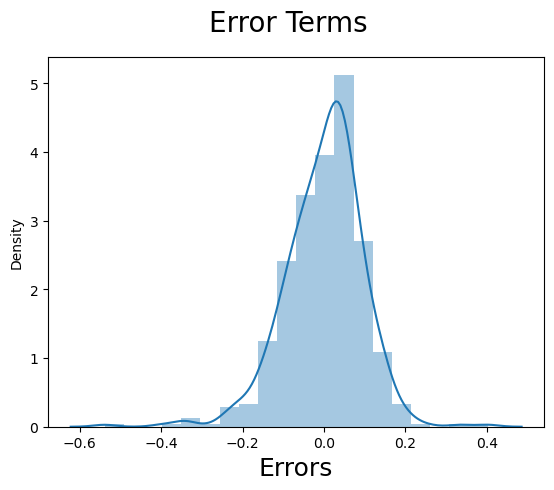

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 13th model.

#### Applying the scaling on the test sets

In [82]:
num_vars = ['temp',	'atemp', 'hum',	'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [83]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.254916,0.505149,0.516216,...,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.209581,0.235390,0.238702,...,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.096295,0.323690,0.359882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.213761,0.504523,0.520241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.347251,0.653774,0.682487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
# Adding constant variable to test dataframe
X_test_m13 = sm.add_constant(X_test)

In [86]:
# Creating X_test_m13 dataframe by dropping variables from X_test_m13

X_test_m13 = X_test_m13.drop(['workingday', 'Clear, Few clouds, Partly cloudy, Partly cloudy', 'atemp', 'hum', 'winter', 'temp', 'summer',
                            'Friday', 'Tuesday', 'registered', 'casual', 'Wednesday'], axis = 1)

In [87]:
# Making predictions using the 13th model

y_pred_m13 = lr_13.predict(X_test_m13)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

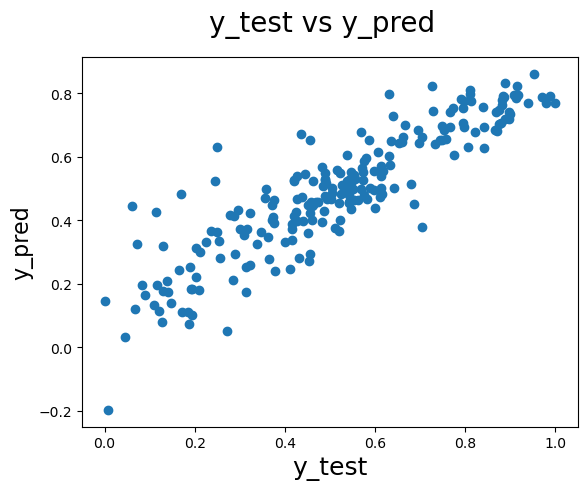

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m13)

0.7777930980010884